# Pull data from Hybrid-Analysis using their API and make a model to predict whether traffic is malicious or no

### conda install requests

In [2]:
import requests
import json

### Set headers for the API request

In [3]:
parameters = {
    "api-key": "s3vwbiju16f29800tnrm7m1o11d8af609qpen4wg539481160qg3q7rh3c96aabc",
    "accept-encoding" : "gzip",
    "user-agent" : "Falcon Sandbox"
}

### Pull from feed

In [4]:
response = requests.get("https://www.hybrid-analysis.com/feed?json", headers=parameters)
## log out the return code and any headers - not required for this problem but useful
print("response code: ", response.status_code, "content length is ", len(response.content))
print("headers: ", json.dumps(response.headers.__dict__, sort_keys=True, indent=4))

response code:  200 content length is  2755176
headers:  {
    "_store": {
        "access-control-allow-origin": [
            "Access-Control-Allow-Origin",
            "*"
        ],
        "cache-control": [
            "Cache-Control",
            "max-age=0, private, must-revalidate, max-age=2592000"
        ],
        "cf-cache-status": [
            "CF-Cache-Status",
            "DYNAMIC"
        ],
        "cf-ray": [
            "CF-RAY",
            "63bfb4246a802717-DEN"
        ],
        "cf-request-id": [
            "cf-request-id",
            "094baeeac1000027175b3c5000000001"
        ],
        "connection": [
            "Connection",
            "keep-alive"
        ],
        "content-encoding": [
            "Content-Encoding",
            "gzip"
        ],
        "content-security-policy": [
            "Content-Security-Policy",
            "default-src 'none'; connect-src 'self' *.twitter.com; script-src 'self' *.google.com *.gstatic.com *.google-analytics.

In [5]:
json_response = response.json()
datasets = json_response['data']
print(datasets)

[{'md5': '1eeb3f9c3f9ff9f0bf14001176d94e9b', 'sha1': 'c5303bce72077860f6e6981afe100e2e8142858b', 'sha256': '03f0264d2787e11e75e912a622858a53e12d1b784e5e44e2eb192f7881bc0824', 'isunknown': True, 'isinteresting': False, 'analysis_start_time': '2021-04-07 01:58:02', 'threatscore': 23, 'threatlevel': 0, 'threatlevel_human': 'no specific threat', 'submitname': 'https://insureatoasis.com/Login/CustomerPortalLogin?userID=1cc6dfb7-85ca-4b9d-a38a-b6ebfda35b23&refId=65167', 'isurlanalysis': True, 'domains': ['cacerts.digicert.com', 'cdn.jsdelivr.net', 'cdnjs.cloudflare.com', 'connect.facebook.net', 'fonts.googleapis.com', 'fonts.gstatic.com', 'insureatoasis.com', 'maps.googleapis.com', 'maps.gstatic.com', 'maxcdn.bootstrapcdn.com', 'o.ss2.us', 'oasisdocuments.blob.core.windows.net', 'ocsp.godaddy.com', 'ocsp.pki.goog', 'ocsp.rootca1.amazontrust.com', 'ocsp.rootg2.amazontrust.com', 'script.hotjar.com', 'static.hotjar.com', 'stats.g.doubleclick.net', 'vars.hotjar.com'], 'hosts': ['192.124.249.36',

In [6]:
json_response = response.json()
datasets = json_response['data']
print (len(datasets))
print ("first one is of type ", type(datasets[0]))
#print ("first one is ", datasets[0])
print (datasets[0].keys())
print()
#print ("first one is ", json.dumps(datasets[0], sort_keys=True, indent=4))
print ("is interesting: ", datasets[0].get("isinteresting"), " threatscore:", datasets[0].get("threatscore"), "reporturl: ", datasets[0].get("reporturl"), " sha256:", datasets[0].get("sha256"))

171
first one is of type  <class 'dict'>
dict_keys(['md5', 'sha1', 'sha256', 'isunknown', 'isinteresting', 'analysis_start_time', 'threatscore', 'threatlevel', 'threatlevel_human', 'submitname', 'isurlanalysis', 'domains', 'hosts', 'hosts_geo', 'compromised_hosts', 'environmentId', 'environmentDescription', 'sharedanalysis', 'isreliable', 'reporturl', 'process_list', 'extracted_files', 'ssdeep'])

is interesting:  False  threatscore: 23 reporturl:  /sample/03f0264d2787e11e75e912a622858a53e12d1b784e5e44e2eb192f7881bc0824/606d11a577e80a350a19af0c  sha256: 03f0264d2787e11e75e912a622858a53e12d1b784e5e44e2eb192f7881bc0824


### This for loop is just practice for a similar for loop later on. Not used in model

In [7]:
for aThing in datasets:
    print ("is interesting: ", aThing.get("isinteresting"), " threatscore:", aThing.get("threatscore"),  " reporturl:", aThing.get("reporturl"),  " sha256:", aThing.get("sha256"))

is interesting:  False  threatscore: 23  reporturl: /sample/03f0264d2787e11e75e912a622858a53e12d1b784e5e44e2eb192f7881bc0824/606d11a577e80a350a19af0c  sha256: 03f0264d2787e11e75e912a622858a53e12d1b784e5e44e2eb192f7881bc0824
is interesting:  False  threatscore: 18  reporturl: /sample/210b3b23954145dc264d647515be069cfe4278bfabc0622db47205d4680cecd1/606d11a7de549f05911c42f4  sha256: 210b3b23954145dc264d647515be069cfe4278bfabc0622db47205d4680cecd1
is interesting:  False  threatscore: 20  reporturl: /sample/ada296f097e7db78b87099c6cd27b9075eeda47ea9aeee5a49417fb254e61a41/606d118237af2d292b53c677  sha256: ada296f097e7db78b87099c6cd27b9075eeda47ea9aeee5a49417fb254e61a41
is interesting:  False  threatscore: 37  reporturl: /sample/e43929d93c7100ab884a99ab33e79248f352f336cf990efb77e5aa2ec44be461/606d113cfdbbb934fa00f657  sha256: e43929d93c7100ab884a99ab33e79248f352f336cf990efb77e5aa2ec44be461
is interesting:  True  threatscore: 90  reporturl: /sample/57385ff7f892991f1efa8b7234dffb9ba9cbc7d696ae7

### Format the data into a dataframe

In [8]:
import pandas as pd
df = pd.DataFrame(datasets)
df

,md5,sha1,sha256,isunknown,isinteresting,analysis_start_time,threatscore,threatlevel,threatlevel_human,submitname,...,et_alerts_total,et_alerts_real_total,et_alerts,vt_detect,ms_detect,vxfamily,tags,domains_capped,hosts_capped,public_references
0,1eeb3f9c3f9ff9f0bf14001176d94e9b,c5303bce72077860f6e6981afe100e2e8142858b,03f0264d2787e11e75e912a622858a53e12d1b784e5e44...,True,False,2021-04-07 01:58:02,23,0,no specific threat,https://insureatoasis.com/Login/CustomerPortal...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ef0fe8b6b914133bffe76255623c6ab,8969fbc3f398f0ec22e7b7a7892cb928d7dd8d12,210b3b23954145dc264d647515be069cfe4278bfabc062...,False,False,2021-04-07 01:58:01,18,0,no specific threat,RemittanceADV848.htm,...,9.0,9.0,"[{'destip': '23.35.175.139', 'destport': '80',...",0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,d5e7ea7b4032bb23ed84bf37636b2ed9,a65f595b60569ed6b807e963b83f70ca8389a43d,ada296f097e7db78b87099c6cd27b9075eeda47ea9aeee...,False,False,2021-04-07 01:57:31,20,0,no specific threat,http://patsgenealogy.com/js.html?email=glenda....,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,8f87b048cd78fde3a534ca0744c1c361,0c9bdc587af3d326ca3571d239dc24e20197875c,e43929d93c7100ab884a99ab33e79248f352f336cf990e...,False,False,2021-04-07 01:56:22,37,2,malicious,possible_vir.txt.cynet,...,NaN,NaN,NaN,5.0,5.0,Rce.Gen3,NaN,NaN,NaN,NaN
4,d33a248e88f3b8837a86fd6bd679ae34,8ab0de56eed15d28e59e16e8920a76a278f95111,57385ff7f892991f1efa8b7234dffb9ba9cbc7d696ae74...,True,True,2021-04-07 01:56:12,90,2,malicious,1617760562_pafish.exe,...,NaN,NaN,NaN,NaN,NaN,NaN,[evasive],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,3b8067131cafb3cdb165d04c858a71fd,dfb2897359e300832dce6dda8f372c84ed466447,499516d42f91693a8054aec62664f0346aa536f9eb6589...,True,True,2021-04-07 00:16:10,90,2,malicious,1617754561_pafish.exe,...,NaN,NaN,NaN,NaN,NaN,NaN,[evasive],NaN,NaN,NaN
167,0edb7f4e406e54da69e2a3dff64f60a8,18550af4d97efff4c43ee1f26b5defafc815068f,ad2371b5a9a74607766969ad97870539352d6931307a0f...,True,True,2021-04-07 00:16:09,85,2,malicious,1617754561_w7x32_pafish.exe,...,NaN,NaN,NaN,NaN,NaN,NaN,[evasive],NaN,NaN,NaN
168,995123f63e4c22bc0b5aa0f62f9d01f4,8d478d03a0f1f74006f610556c57711748ace9cb,318b4c57037fe2dded5e1817d184f44a79f65686f56d2f...,True,False,2021-04-07 00:16:09,0,0,no specific threat,https://google.com/search?q=ZGE2MGZjMjJhMGE2YT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,44689d4b168ad10a071cbab45dee371a,1b94b6498e5f7f71e64a5886297ad75c0127ec86,2d06547cd9b959dbb0c965b365e86a0038e4d6ce13e15d...,True,False,2021-04-07 00:14:58,70,0,no specific threat,f4a8c9d6ad3f70e1b40e8699201e509720d296.pdf,...,9.0,9.0,"[{'destip': '104.117.148.96', 'destport': '80'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Look at the reporturl column to see how we need to split it up so we can put the values in a for loop to pull each individual report

In [9]:
df["reporturl"]

0      /sample/03f0264d2787e11e75e912a622858a53e12d1b...
1      /sample/210b3b23954145dc264d647515be069cfe4278...
2      /sample/ada296f097e7db78b87099c6cd27b9075eeda4...
3      /sample/e43929d93c7100ab884a99ab33e79248f352f3...
4      /sample/57385ff7f892991f1efa8b7234dffb9ba9cbc7...
                             ...                        
166    /sample/499516d42f91693a8054aec62664f0346aa536...
167    /sample/ad2371b5a9a74607766969ad97870539352d69...
168    /sample/318b4c57037fe2dded5e1817d184f44a79f656...
169    /sample/2d06547cd9b959dbb0c965b365e86a0038e4d6...
170    /sample/f16115abc65ac36d6f0d4fb979a1f42d7cf16f...
Name: reporturl, Length: 171, dtype: object

### Split the report url to seperate out jobid

In [10]:
#Filter out /sample/ from reporturl column
df["jobid"]=df["reporturl"].str.split("/", expand=True)[3]
list(df)

['md5',
 'sha1',
 'sha256',
 'isunknown',
 'isinteresting',
 'analysis_start_time',
 'threatscore',
 'threatlevel',
 'threatlevel_human',
 'submitname',
 'isurlanalysis',
 'domains',
 'hosts',
 'hosts_geo',
 'compromised_hosts',
 'environmentId',
 'environmentDescription',
 'sharedanalysis',
 'isreliable',
 'reporturl',
 'process_list',
 'extracted_files',
 'ssdeep',
 'avdetect',
 'size',
 'type',
 'et_alerts_total',
 'et_alerts_real_total',
 'et_alerts',
 'vt_detect',
 'ms_detect',
 'vxfamily',
 'tags',
 'domains_capped',
 'hosts_capped',
 'public_references',
 'jobid']

### Combine url with job id so we can insert into for loop to pull all the matching reports from the feed.

In [11]:
df["url"]= "https://www.hybrid-analysis.com/api/v2/report/"+df["jobid"]+"/summary"
df["url"]

0      https://www.hybrid-analysis.com/api/v2/report/...
1      https://www.hybrid-analysis.com/api/v2/report/...
2      https://www.hybrid-analysis.com/api/v2/report/...
3      https://www.hybrid-analysis.com/api/v2/report/...
4      https://www.hybrid-analysis.com/api/v2/report/...
                             ...                        
166    https://www.hybrid-analysis.com/api/v2/report/...
167    https://www.hybrid-analysis.com/api/v2/report/...
168    https://www.hybrid-analysis.com/api/v2/report/...
169    https://www.hybrid-analysis.com/api/v2/report/...
170    https://www.hybrid-analysis.com/api/v2/report/...
Name: url, Length: 171, dtype: object

### DO NOT USE THIS ONE: Use api to pull report summary data 

In [12]:
#for index, row in df.iterrows():
    ## log out the return code and any headers - not required for this problem but useful
    #print(row["url"])
    #response = requests.get(row["url"], headers=parameters)
    #print("response code: ", response.status_code, "content length is ", len(response.content))
    #print("headers: ", json.dumps(response.headers.__dict__, sort_keys=True, indent=4))
    #json_response = response.json()
    #report = json_response['data']
    #print(json_response)
    
    #df.at[index,"summary"] = json_response

### This call puts the json data and puts it into a new "summary" column

In [13]:
def get_summary(row):
    #print(row)
    response = requests.get(row["url"], headers=parameters)
    print("response code: ", response.status_code, "content length is ", len(response.content))
    #print("headers: ", json.dumps(response.headers.__dict__, sort_keys=True, indent=4))
    json_response = response.json()
    #report = json_response['data']
    #print(json_response)
    
    return json_response
    
df["summary"] = df.apply(get_summary, axis = 1)

response code:  200 content length is  33201
response code:  200 content length is  14965
response code:  200 content length is  25078
response code:  200 content length is  17502
response code:  200 content length is  7603
response code:  200 content length is  7634
response code:  200 content length is  12510
response code:  200 content length is  1788
response code:  200 content length is  33644
response code:  200 content length is  29952
response code:  200 content length is  6628
response code:  200 content length is  7008
response code:  200 content length is  3549
response code:  200 content length is  24187
response code:  200 content length is  6861
response code:  200 content length is  7634
response code:  200 content length is  12239
response code:  200 content length is  31865
response code:  200 content length is  33721
response code:  200 content length is  224387
response code:  200 content length is  25664
response code:  200 content length is  30133
response code:  2

### Make sure it worked and added the new summary column

In [14]:
df["summary"]

0      {'job_id': '606d11a577e80a350a19af0c', 'enviro...
1      {'job_id': '606d11a7de549f05911c42f4', 'enviro...
2      {'job_id': '606d118237af2d292b53c677', 'enviro...
3      {'job_id': '606d113cfdbbb934fa00f657', 'enviro...
4      {'job_id': '606d1132bd81976cdd53dfc1', 'enviro...
                             ...                        
166    {'job_id': '606cf9c255ce282ecc4c4ce0', 'enviro...
167    {'job_id': '606cf9c27e7e760c0d217334', 'enviro...
168    {'job_id': '606cf9c24035ed67322516c3', 'enviro...
169    {'job_id': '606cf97cd2289f096c75f55b', 'enviro...
170    {'job_id': '606cf89dbebd752f3047c2d0', 'enviro...
Name: summary, Length: 171, dtype: object

### Just checking the summary column type

In [15]:
print(type(df["summary"]))
print(df["summary"].dtypes)

<class 'pandas.core.series.Series'>
object


### This makes sure no failed reports are included. Aka if we run out of daily requests those aren't added into the dataframe. The block below shows the length of each summary.

In [16]:
df['sum_len'] = df['summary'].str.len()
print(df['sum_len'])

0      41
1      41
2      41
3      41
4      41
       ..
166    41
167    41
168    41
169    41
170    41
Name: sum_len, Length: 171, dtype: int64


### This block gets rid of all the summary's that didn't come through. their length is less than 2

In [17]:
df = df[df.sum_len > 2]
print(df['sum_len'])

0      41
1      41
2      41
3      41
4      41
       ..
166    41
167    41
168    41
169    41
170    41
Name: sum_len, Length: 171, dtype: int64


### Create function to make a new row counting the number of mitre attacks

In [18]:
#for index, row in df.iterrows():
    # log out the return code and any headers - not required for this problem but useful
    #print(len(row["summary"]["mitre_attcks"]))
    
def get_num_mitre_attcks(row):
    return len(row["summary"]["mitre_attcks"])

    
df["num_mitre_attcks"] = df.apply(get_num_mitre_attcks, axis = 1)
print(df['num_mitre_attcks'])

0       0
1       0
2       0
3       7
4      16
       ..
166    16
167    14
168     0
169     0
170     0
Name: num_mitre_attcks, Length: 171, dtype: int64


# Model Building
### Import needed packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

# Make a copy of df. We can only access so many pulls in one day from the api so it is imperitive to work "offline" to keep testing

In [20]:
df2 = df.copy()

### Make the 'isinteresting' column a binary

In [21]:
df2 = df2.reset_index()
np.isnan(df2.any()) 
np.isfinite(df2.all()) 
df2

,index,md5,sha1,sha256,isunknown,isinteresting,analysis_start_time,threatscore,threatlevel,threatlevel_human,...,vxfamily,tags,domains_capped,hosts_capped,public_references,jobid,url,summary,sum_len,num_mitre_attcks
0,0,1eeb3f9c3f9ff9f0bf14001176d94e9b,c5303bce72077860f6e6981afe100e2e8142858b,03f0264d2787e11e75e912a622858a53e12d1b784e5e44...,True,False,2021-04-07 01:58:02,23,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,606d11a577e80a350a19af0c,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606d11a577e80a350a19af0c', 'enviro...",41,0
1,1,2ef0fe8b6b914133bffe76255623c6ab,8969fbc3f398f0ec22e7b7a7892cb928d7dd8d12,210b3b23954145dc264d647515be069cfe4278bfabc062...,False,False,2021-04-07 01:58:01,18,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,606d11a7de549f05911c42f4,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606d11a7de549f05911c42f4', 'enviro...",41,0
2,2,d5e7ea7b4032bb23ed84bf37636b2ed9,a65f595b60569ed6b807e963b83f70ca8389a43d,ada296f097e7db78b87099c6cd27b9075eeda47ea9aeee...,False,False,2021-04-07 01:57:31,20,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,606d118237af2d292b53c677,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606d118237af2d292b53c677', 'enviro...",41,0
3,3,8f87b048cd78fde3a534ca0744c1c361,0c9bdc587af3d326ca3571d239dc24e20197875c,e43929d93c7100ab884a99ab33e79248f352f336cf990e...,False,False,2021-04-07 01:56:22,37,2,malicious,...,Rce.Gen3,NaN,NaN,NaN,NaN,606d113cfdbbb934fa00f657,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606d113cfdbbb934fa00f657', 'enviro...",41,7
4,4,d33a248e88f3b8837a86fd6bd679ae34,8ab0de56eed15d28e59e16e8920a76a278f95111,57385ff7f892991f1efa8b7234dffb9ba9cbc7d696ae74...,True,True,2021-04-07 01:56:12,90,2,malicious,...,NaN,[evasive],NaN,NaN,NaN,606d1132bd81976cdd53dfc1,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606d1132bd81976cdd53dfc1', 'enviro...",41,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,3b8067131cafb3cdb165d04c858a71fd,dfb2897359e300832dce6dda8f372c84ed466447,499516d42f91693a8054aec62664f0346aa536f9eb6589...,True,True,2021-04-07 00:16:10,90,2,malicious,...,NaN,[evasive],NaN,NaN,NaN,606cf9c255ce282ecc4c4ce0,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606cf9c255ce282ecc4c4ce0', 'enviro...",41,16
167,167,0edb7f4e406e54da69e2a3dff64f60a8,18550af4d97efff4c43ee1f26b5defafc815068f,ad2371b5a9a74607766969ad97870539352d6931307a0f...,True,True,2021-04-07 00:16:09,85,2,malicious,...,NaN,[evasive],NaN,NaN,NaN,606cf9c27e7e760c0d217334,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606cf9c27e7e760c0d217334', 'enviro...",41,14
168,168,995123f63e4c22bc0b5aa0f62f9d01f4,8d478d03a0f1f74006f610556c57711748ace9cb,318b4c57037fe2dded5e1817d184f44a79f65686f56d2f...,True,False,2021-04-07 00:16:09,0,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,606cf9c24035ed67322516c3,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606cf9c24035ed67322516c3', 'enviro...",41,0
169,169,44689d4b168ad10a071cbab45dee371a,1b94b6498e5f7f71e64a5886297ad75c0127ec86,2d06547cd9b959dbb0c965b365e86a0038e4d6ce13e15d...,True,False,2021-04-07 00:14:58,70,0,no specific threat,...,NaN,NaN,NaN,NaN,NaN,606cf97cd2289f096c75f55b,https://www.hybrid-analysis.com/api/v2/report/...,"{'job_id': '606cf97cd2289f096c75f55b', 'enviro...",41,0


### Check how many interesting rows there are

In [22]:
df2["isinteresting_binary"] = df2["isinteresting"].astype(int)

Total = df2['isinteresting_binary'].sum()
print (Total)

33


### Try making nan values 0

In [23]:
def clean_dataset(df2):
    assert isinstance(df2, pd.DataFrame), "df needs to be a pd.DataFrame"
    df2.dropna(inplace=True)
    indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(1)
    return df2[indices_to_keep].astype(np.float64)

### Add input variables and split the testing data on a 70/30 split

In [24]:
X=df2[['threatscore', 'threatlevel', 'num_mitre_attcks']]
y=df2['isinteresting_binary'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Forest model. Create a classifier and fit on training data

### Show the Accuracy score

In [25]:
from sklearn.ensemble import RandomForestClassifier

cla=RandomForestClassifier(n_estimators=100)

cla.fit(X_train,y_train)

y_pred=cla.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9807692307692307


### Show the Precision-recall score

In [26]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.92


### Plot the roc curve

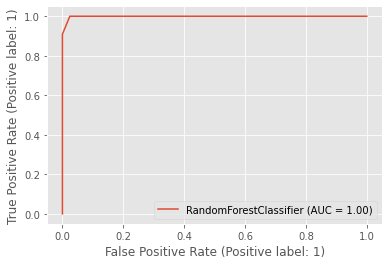

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
rf = plot_roc_curve(cla, X_test, y_test)
plt.show()

### Graph the feature importance on the RandomForest Classifier

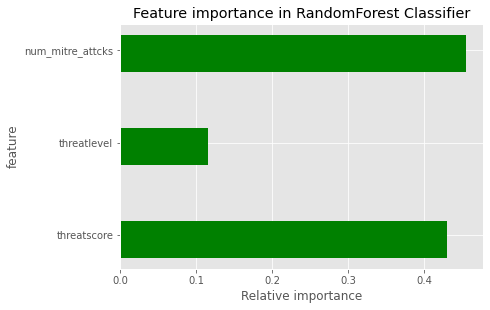

<Figure size 360x360 with 0 Axes>

In [56]:
fn=['threatscore', 'threatlevel', 'num_mitre_attcks']

y = cla.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(fn, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)